# Project 6 - Part 1
## Experimenting with linear regression and its variations

## Part 1 Conclusion

- The old faithful geiser data does present a relationship between eruption duration and time waiting.
- The longer the wait time, the longer the eruption.
- Furthermore, the proportion of wait time to eruption time are normally distributed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

1. Load scipy.stats and seaborn using the same technique you used to load Jupyter Notebook, Panda, etc. 
2. Find oldfaithful.csv in my GitHub repository (A-Data) and copy it to the directory/folder where you are working on Project 7. No hard-coded PATH this time.
3. The dataset provides data about Old Faithful, the best-known geyser in Yellowstone.  Specifically:
    - Column 1: Duration of an Eruption
    - Column 2: Waiting times since the last eruption
4. Your task is to determine whether eruption duration plotted waiting time is linear. X-axis is the waiting time.  Y-axis is the size of the eruption.  
5. Specifically, Find 7-3.ipynb in …/CPSC222/G-Regression
6. Perform all four tests enumerated at the top of  the notebook
7. In place, of four test descriptions, write your conclusion, addressing the results of each of the four tests.

In [2]:
df = pd.read_csv("oldfaithful.csv")
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Eruption  272 non-null    float64
 1   Waiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB
None


# How to Determine if Linear Regression Models Data Well
## 1. x and y have a linear relationship.
### How to tell: Scatter plot looks like it follows a line
## 2. The residuals of the observations are independent of one another
### How to tell: if suspected time dependency, plot residuals against time.  They should look random.  Other dependencies work similarly
## 3. The mean of the residuals is 0 and the variance is constant
### How to tell: Plot residuals against predicted values. They should vary evenly about a horizontal line at y = 0
## 4. The residuals are normally distributed
### How to tell: Plot observed residuals against theoretical normal residuals. Plot 45 degree line. Points are close to line if normally distributed.This is done in both matplotlib and seaborn with a QQ plot (quantileXquantile)

## Step 1

In [3]:
X = df[['Waiting']].values.reshape(-1, 1)
y = df[['Eruption']].values.reshape(-1, 1)
linModel = LinearRegression()

In [4]:
linModel.fit(X, y)
print("Slope (m):", linModel.coef_[0].item())
print("Intercept (b):", linModel.intercept_.item())

Slope (m): 0.0756279479518627
Intercept (b): -1.8740159864107366


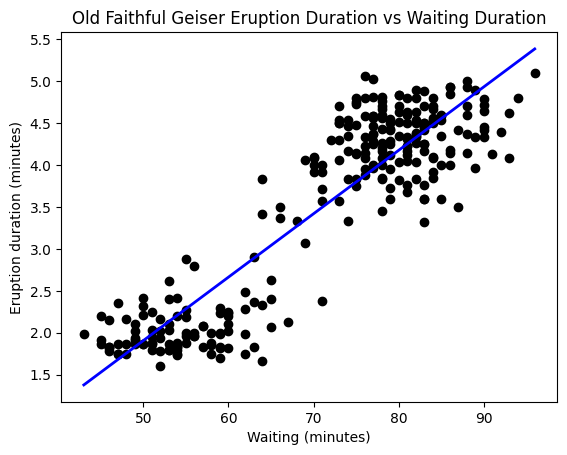

In [5]:
y_pred = linModel.predict(X)
plt.scatter(X, y, color='black')

X_plot = np.sort(X,axis=0)
y_plot = linModel.predict(X_plot)

plt.plot(X_plot, y_plot,color='blue', linewidth=2)
plt.xlabel('Waiting (minutes)')
plt.ylabel('Eruption duration (minutes)')
plt.title('Old Faithful Geiser Eruption Duration vs Waiting Duration')
plt.show()

## Step 1 Conclusion

x and y do appear to have a linear relationship, as all scatter points fall into the Quadrants 1 and 3 and the line intersects the middle of the clusters.

## Step 2

Text(0.5, 1.0, 'Fitted value vs. residual plot')

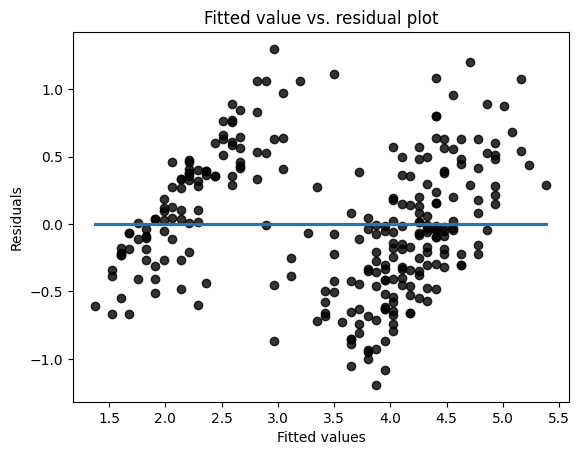

In [6]:
yResid = y_pred - y

p = sns.regplot(x=y_pred, y=yResid, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Fitted values')
p.set_ylabel('Residuals')
p.set_title('Fitted value vs. residual plot')


## Step 2 Conclusion

Residuals plotted against time do not present a pattern, and are distributed evenly above and below a line at y=0.

## Step 3/4

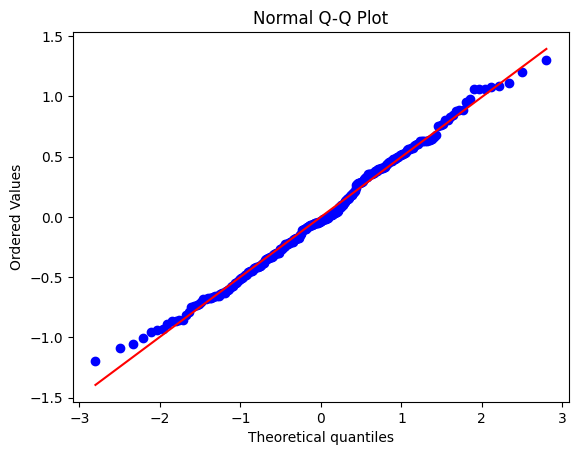

In [7]:
yResid = np.asarray(yResid).reshape(-1)
stats.probplot(yResid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

## Step 3/4 Conclusion

The data appears to be normally distributed, as points vary minimally about the line.